In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
kakao = fdr.DataReader('035720')

In [5]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [6]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [7]:
kakao['year'] = kakao.index.year

In [8]:
kakao['month'] = kakao.index.month

In [9]:
kakao['day'] = kakao.index.day

In [10]:
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2
2023-11-03,39250,41550,38900,41300,3675484,0.071336,2023,11,3


Text(0, 0.5, 'price')

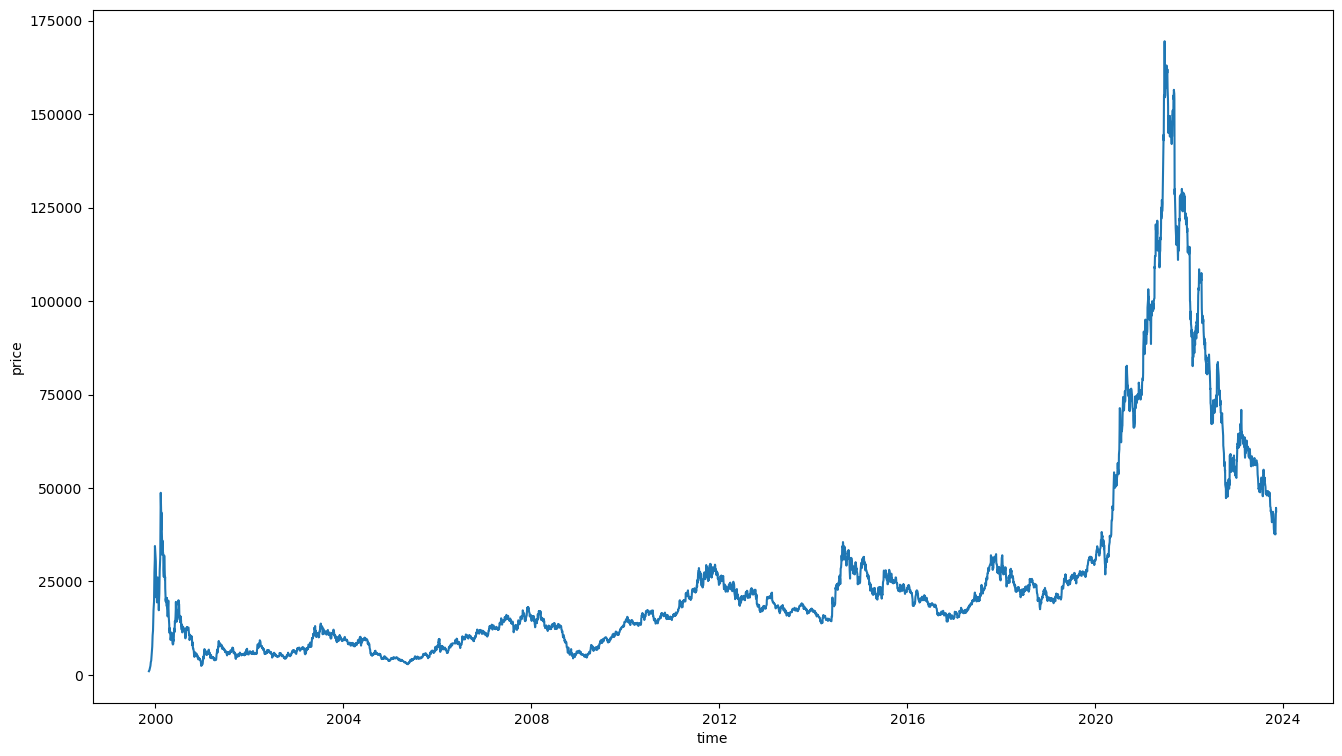

In [11]:
plt.figure(figsize=(16,9))
sns.lineplot(y=kakao['Close'], x=kakao.index)
plt.xlabel('time')
plt.ylabel('price')

In [12]:
ts = [['2000', '2010'],
      ['2010', '2015'],
      ['2015', '2020'],
      ['2020', '2023']]

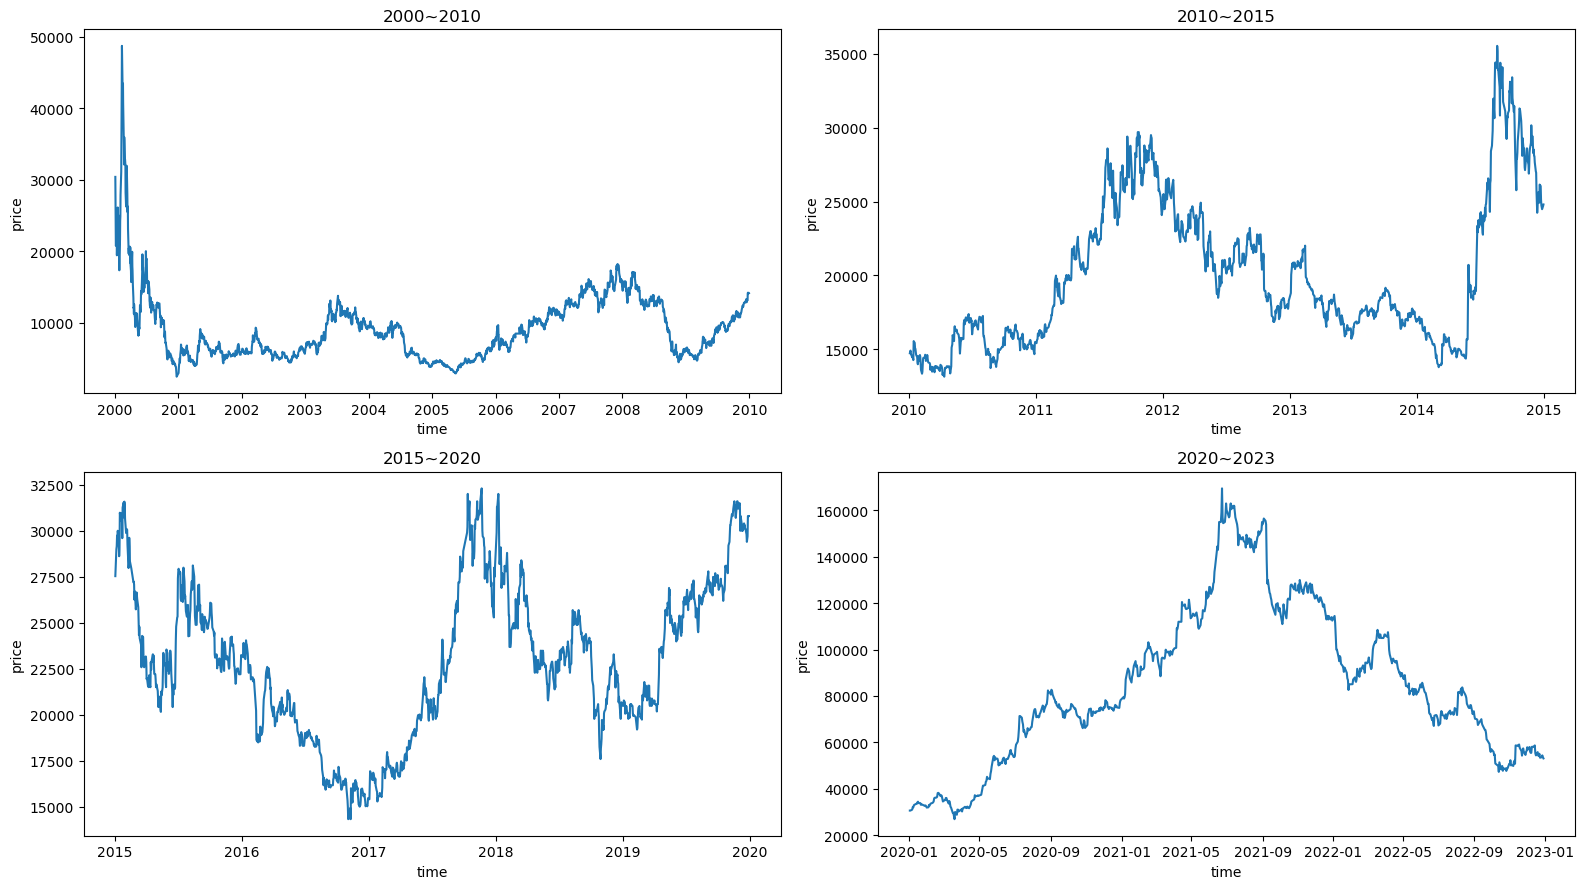

In [13]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [17]:
scaled = scaler.fit_transform(kakao[cols])

In [18]:
df = pd.DataFrame(scaled, columns=cols)

In [19]:
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_14236\3482217535.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [22]:
xtrain.shape

(4736, 4)

In [23]:
ytrain.shape

(4736,)

In [24]:
xtest.shape

(1185, 4)

In [25]:
ytest.shape

(1185,)

In [26]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [27]:
xtrain, ytrain = make_dataset(xtrain, ytrain , 20)

In [28]:
xtrain

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],

       [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
        ...,
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
        [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],

       [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        

In [29]:
xtrain.shape

(4716, 20, 4)

In [30]:
ytrain = ytrain.reshape(ytrain.shape[0],1)
ytrain.shape

(4716, 1)

In [31]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [32]:
xtest.shape

(1165, 20, 4)

In [33]:
ytest = ytest.reshape(ytest.shape[0], 1)
ytest.shape

(1165, 1)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [35]:
model = Sequential()

In [36]:
model.add(LSTM(16,
               input_shape = (xtrain.shape[1], xtrain.shape[2]),
               activation = 'relu',
               return_sequences = False))
model.add(Dense(1))

In [37]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [38]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [39]:
history = model.fit(xtrain, ytrain,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
224/236 [===========================>..] - ETA: 0s - loss: 8.0723e-04
Epoch 1: val_loss improved from inf to 0.00005, saving model to tmp_checkpoint.h5
236/236 [==============================] - 2s 5ms/step - loss: 7.6955e-04 - val_loss: 4.5407e-05
Epoch 2/200
 37/236 [===>..........................] - ETA: 0s - loss: 8.3372e-05

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/236 [===========================>..] - ETA: 0s - loss: 5.7312e-05
Epoch 2: val_loss improved from 0.00005 to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 5.5919e-05 - val_loss: 4.1975e-05
Epoch 3/200
228/236 [===========================>..] - ETA: 0s - loss: 5.2385e-05
Epoch 3: val_loss did not improve from 0.00004
236/236 [==============================] - 1s 4ms/step - loss: 5.1588e-05 - val_loss: 4.3911e-05
Epoch 4/200
235/236 [============================>.] - ETA: 0s - loss: 4.9930e-05
Epoch 4: val_loss did not improve from 0.00004
236/236 [==============================] - 1s 4ms/step - loss: 4.9801e-05 - val_loss: 4.6413e-05
Epoch 5/200
233/236 [============================>.] - ETA: 0s - loss: 4.6953e-05
Epoch 5: val_loss improved from 0.00004 to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 4.6764e-05 - val_loss: 3.5907e-05
Epoch 6/200
231/236 [=========

236/236 [==============================] - 1s 4ms/step - loss: 1.8668e-05 - val_loss: 1.9768e-05
Epoch 36/200
232/236 [============================>.] - ETA: 0s - loss: 1.9101e-05
Epoch 36: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 1.9099e-05 - val_loss: 2.5950e-05
Epoch 37/200
225/236 [===========================>..] - ETA: 0s - loss: 1.7787e-05
Epoch 37: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 1.7954e-05 - val_loss: 2.2273e-05
Epoch 38/200
236/236 [==============================] - ETA: 0s - loss: 1.8834e-05
Epoch 38: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 1.8834e-05 - val_loss: 2.3102e-05
Epoch 39/200
235/236 [============================>.] - ETA: 0s - loss: 1.7401e-05
Epoch 39: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 1.7422e-05 - val_loss: 2.

In [40]:
model.load_weights('tmp_checkpoint.h5')

In [41]:
pred = model.predict(xtest)

37/37 [==============================] - 0s 2ms/step


In [42]:
pred.shape

(1165, 1)

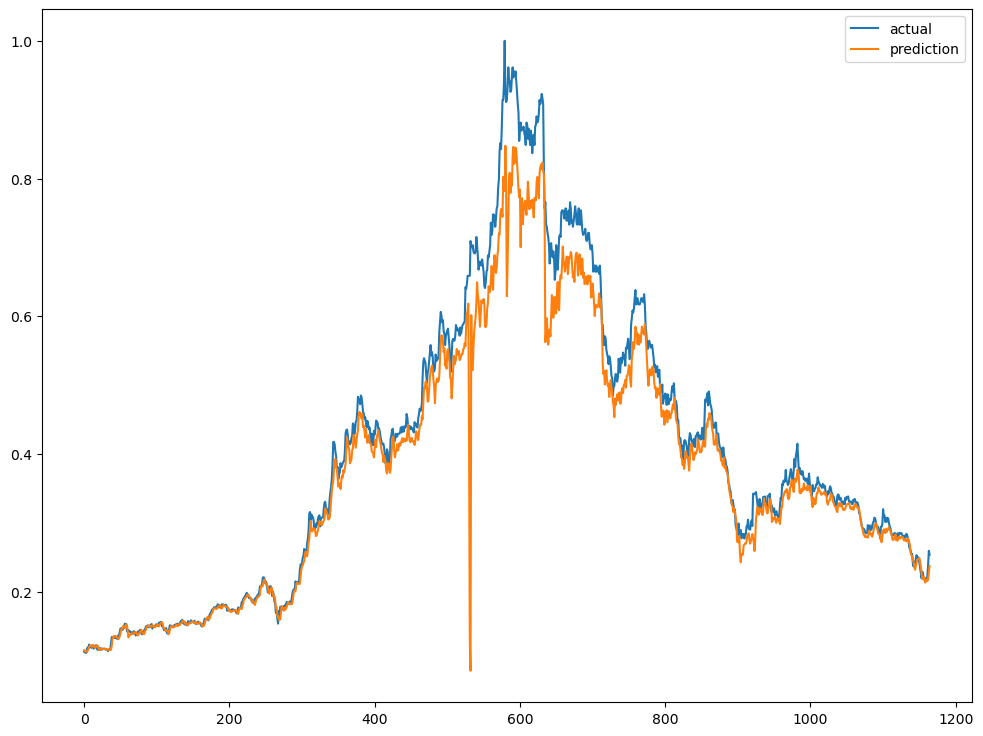

In [43]:
plt.figure(figsize=(12,9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [45]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [47]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [51]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [52]:
len(tokenizer.word_index)

11

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1

In [53]:
sequences = list()
for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [54]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [55]:
max_len = max(len(l) for l in sequences)

In [56]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [57]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [58]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [59]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [60]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [61]:
y = to_categorical(y, num_classes=vocab_size)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [63]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 2s - loss: 2.4862 - accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 2.4834 - accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4806 - accuracy: 0.2727 - 0s/epoch - 0s/step
Epoch 4/200
1/1 - 0s - loss: 2.4778 - accuracy: 0.3636 - 0s/epoch - 0s/step
Epoch 5/200
1/1 - 0s - loss: 2.4750 - accuracy: 0.4545 - 15ms/epoch - 15ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4721 - accuracy: 0.4545 - 0s/epoch - 0s/step
Epoch 7/200
1/1 - 0s - loss: 2.4693 - accuracy: 0.3636 - 0s/epoch - 0s/step
Epoch 8/200
1/1 - 0s - loss: 2.4663 - accuracy: 0.3636 - 17ms/epoch - 17ms/step
Epoch 9/200
1/1 - 0s - loss: 2.4633 - accuracy: 0.3636 - 0s/epoch - 0s/step
Epoch 10/200
1/1 - 0s - loss: 2.4602 - accuracy: 0.3636 - 0s/epoch - 0s/step
Epoch 11/200
1/1 - 0s - loss: 2.4570 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 2.4537 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 13/200
1/1 - 0s - loss: 2.4503 - accuracy: 0.3636 - 3ms

Epoch 106/200
1/1 - 0s - loss: 1.6377 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 107/200
1/1 - 0s - loss: 1.6290 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 108/200
1/1 - 0s - loss: 1.6202 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 109/200
1/1 - 0s - loss: 1.6111 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 110/200
1/1 - 0s - loss: 1.6020 - accuracy: 0.4545 - 5ms/epoch - 5ms/step
Epoch 111/200
1/1 - 0s - loss: 1.5927 - accuracy: 0.4545 - 0s/epoch - 0s/step
Epoch 112/200
1/1 - 0s - loss: 1.5832 - accuracy: 0.4545 - 0s/epoch - 0s/step
Epoch 113/200
1/1 - 0s - loss: 1.5736 - accuracy: 0.4545 - 0s/epoch - 0s/step
Epoch 114/200
1/1 - 0s - loss: 1.5639 - accuracy: 0.4545 - 19ms/epoch - 19ms/step
Epoch 115/200
1/1 - 0s - loss: 1.5539 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 116/200
1/1 - 0s - loss: 1.5439 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 117/200
1/1 - 0s - loss: 1.5337 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 118/200
1/1 - 0s - loss: 1.5233 - accu

In [64]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [67]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


In [68]:
text = '''

화려한 도시를 그리며 찾아왔네

그 곳은 춥고도 험한 곳

여기저기 헤매다 초라한 문턱에서

뜨거운 눈물을 먹는다

머나먼 길을 찾아 여기에 꿈을 찾아 여기에

괴롭고도 험한 이 길을 왔는데

이 세상 어디가 숲인지 어디가 늪인지

그 누구도 말을 않네

사람들은 저마다 고향을 찾아가네

나는 지금 홀로 남아서

빌딩 속을 헤매이다 초라한 골목에서

뜨거운 눈물을 먹는다

저기 저 별은 나의 마음을 알까 나의 꿈을 알까

괴로울 땐 슬픈 노래를 부른다

슬퍼질 땐 차라리 나 홀로 눈을 감고 싶어

고향의 향기 들으면서

저기 저 별은 나의 마음 알까 나의 꿈을 알까

괴로울 땐 슬픈 노래를 부른다

이 세상 어디가 숲인지 어디가 늪인지

그 누구도 말을 않네

슬퍼질 땐 차라리 나 홀로 눈을 감고 싶어

고향의 향기 들으면서

고향의 향기 들으면서

'''

In [69]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1

In [70]:
tokenizer.word_index

{'어디가': 1,
 '나의': 2,
 '알까': 3,
 '땐': 4,
 '그': 5,
 '꿈을': 6,
 '이': 7,
 '홀로': 8,
 '고향의': 9,
 '향기': 10,
 '들으면서': 11,
 '험한': 12,
 '초라한': 13,
 '뜨거운': 14,
 '눈물을': 15,
 '먹는다': 16,
 '길을': 17,
 '찾아': 18,
 '여기에': 19,
 '세상': 20,
 '숲인지': 21,
 '늪인지': 22,
 '누구도': 23,
 '말을': 24,
 '않네': 25,
 '저기': 26,
 '저': 27,
 '별은': 28,
 '괴로울': 29,
 '슬픈': 30,
 '노래를': 31,
 '부른다': 32,
 '슬퍼질': 33,
 '차라리': 34,
 '나': 35,
 '눈을': 36,
 '감고': 37,
 '싶어': 38,
 '화려한': 39,
 '도시를': 40,
 '그리며': 41,
 '찾아왔네': 42,
 '곳은': 43,
 '춥고도': 44,
 '곳': 45,
 '여기저기': 46,
 '헤매다': 47,
 '문턱에서': 48,
 '머나먼': 49,
 '괴롭고도': 50,
 '왔는데': 51,
 '사람들은': 52,
 '저마다': 53,
 '고향을': 54,
 '찾아가네': 55,
 '나는': 56,
 '지금': 57,
 '남아서': 58,
 '빌딩': 59,
 '속을': 60,
 '헤매이다': 61,
 '골목에서': 62,
 '마음을': 63,
 '마음': 64}

In [75]:
sequences = list()
for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [76]:
sequences

[[39, 40],
 [39, 40, 41],
 [39, 40, 41, 42],
 [5, 43],
 [5, 43, 44],
 [5, 43, 44, 12],
 [5, 43, 44, 12, 45],
 [46, 47],
 [46, 47, 13],
 [46, 47, 13, 48],
 [14, 15],
 [14, 15, 16],
 [49, 17],
 [49, 17, 18],
 [49, 17, 18, 19],
 [49, 17, 18, 19, 6],
 [49, 17, 18, 19, 6, 18],
 [49, 17, 18, 19, 6, 18, 19],
 [50, 12],
 [50, 12, 7],
 [50, 12, 7, 17],
 [50, 12, 7, 17, 51],
 [7, 20],
 [7, 20, 1],
 [7, 20, 1, 21],
 [7, 20, 1, 21, 1],
 [7, 20, 1, 21, 1, 22],
 [5, 23],
 [5, 23, 24],
 [5, 23, 24, 25],
 [52, 53],
 [52, 53, 54],
 [52, 53, 54, 55],
 [56, 57],
 [56, 57, 8],
 [56, 57, 8, 58],
 [59, 60],
 [59, 60, 61],
 [59, 60, 61, 13],
 [59, 60, 61, 13, 62],
 [14, 15],
 [14, 15, 16],
 [26, 27],
 [26, 27, 28],
 [26, 27, 28, 2],
 [26, 27, 28, 2, 63],
 [26, 27, 28, 2, 63, 3],
 [26, 27, 28, 2, 63, 3, 2],
 [26, 27, 28, 2, 63, 3, 2, 6],
 [26, 27, 28, 2, 63, 3, 2, 6, 3],
 [29, 4],
 [29, 4, 30],
 [29, 4, 30, 31],
 [29, 4, 30, 31, 32],
 [33, 4],
 [33, 4, 34],
 [33, 4, 34, 35],
 [33, 4, 34, 35, 8],
 [33, 4, 34, 

In [77]:
max_len = max(len(l) for l in sequences)

In [78]:
sequences = pad_sequences(sequences, maxlen = max_len, padding='pre')

In [79]:
sequences

array([[ 0,  0,  0,  0,  0,  0,  0, 39, 40],
       [ 0,  0,  0,  0,  0,  0, 39, 40, 41],
       [ 0,  0,  0,  0,  0, 39, 40, 41, 42],
       [ 0,  0,  0,  0,  0,  0,  0,  5, 43],
       [ 0,  0,  0,  0,  0,  0,  5, 43, 44],
       [ 0,  0,  0,  0,  0,  5, 43, 44, 12],
       [ 0,  0,  0,  0,  5, 43, 44, 12, 45],
       [ 0,  0,  0,  0,  0,  0,  0, 46, 47],
       [ 0,  0,  0,  0,  0,  0, 46, 47, 13],
       [ 0,  0,  0,  0,  0, 46, 47, 13, 48],
       [ 0,  0,  0,  0,  0,  0,  0, 14, 15],
       [ 0,  0,  0,  0,  0,  0, 14, 15, 16],
       [ 0,  0,  0,  0,  0,  0,  0, 49, 17],
       [ 0,  0,  0,  0,  0,  0, 49, 17, 18],
       [ 0,  0,  0,  0,  0, 49, 17, 18, 19],
       [ 0,  0,  0,  0, 49, 17, 18, 19,  6],
       [ 0,  0,  0, 49, 17, 18, 19,  6, 18],
       [ 0,  0, 49, 17, 18, 19,  6, 18, 19],
       [ 0,  0,  0,  0,  0,  0,  0, 50, 12],
       [ 0,  0,  0,  0,  0,  0, 50, 12,  7],
       [ 0,  0,  0,  0,  0, 50, 12,  7, 17],
       [ 0,  0,  0,  0, 50, 12,  7, 17, 51],
       [ 0

In [80]:
sequences =np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [81]:
X

array([[ 0,  0,  0,  0,  0,  0,  0, 39],
       [ 0,  0,  0,  0,  0,  0, 39, 40],
       [ 0,  0,  0,  0,  0, 39, 40, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  5, 43],
       [ 0,  0,  0,  0,  0,  5, 43, 44],
       [ 0,  0,  0,  0,  5, 43, 44, 12],
       [ 0,  0,  0,  0,  0,  0,  0, 46],
       [ 0,  0,  0,  0,  0,  0, 46, 47],
       [ 0,  0,  0,  0,  0, 46, 47, 13],
       [ 0,  0,  0,  0,  0,  0,  0, 14],
       [ 0,  0,  0,  0,  0,  0, 14, 15],
       [ 0,  0,  0,  0,  0,  0,  0, 49],
       [ 0,  0,  0,  0,  0,  0, 49, 17],
       [ 0,  0,  0,  0,  0, 49, 17, 18],
       [ 0,  0,  0,  0, 49, 17, 18, 19],
       [ 0,  0,  0, 49, 17, 18, 19,  6],
       [ 0,  0, 49, 17, 18, 19,  6, 18],
       [ 0,  0,  0,  0,  0,  0,  0, 50],
       [ 0,  0,  0,  0,  0,  0, 50, 12],
       [ 0,  0,  0,  0,  0, 50, 12,  7],
       [ 0,  0,  0,  0, 50, 12,  7, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  7, 20],
       [ 0,  0, 

In [82]:
y

array([40, 41, 42, 43, 44, 12, 45, 47, 13, 48, 15, 16, 17, 18, 19,  6, 18,
       19, 12,  7, 17, 51, 20,  1, 21,  1, 22, 23, 24, 25, 53, 54, 55, 57,
        8, 58, 60, 61, 13, 62, 15, 16, 27, 28,  2, 63,  3,  2,  6,  3,  4,
       30, 31, 32,  4, 34, 35,  8, 36, 37, 38, 10, 11, 27, 28,  2, 64,  3,
        2,  6,  3,  4, 30, 31, 32, 20,  1, 21,  1, 22, 23, 24, 25,  4, 34,
       35,  8, 36, 37, 38, 10, 11, 10, 11])

In [83]:
y = to_categorical(y, num_classes = vocab_size)

In [84]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [111]:
embedding_dim = 10
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=2)

Epoch 1/300
3/3 - 2s - loss: 4.1754 - accuracy: 0.0213 - 2s/epoch - 585ms/step
Epoch 2/300
3/3 - 0s - loss: 4.1676 - accuracy: 0.0851 - 43ms/epoch - 14ms/step
Epoch 3/300
3/3 - 0s - loss: 4.1584 - accuracy: 0.0957 - 39ms/epoch - 13ms/step
Epoch 4/300
3/3 - 0s - loss: 4.1452 - accuracy: 0.0851 - 33ms/epoch - 11ms/step
Epoch 5/300
3/3 - 0s - loss: 4.1194 - accuracy: 0.0638 - 33ms/epoch - 11ms/step
Epoch 6/300
3/3 - 0s - loss: 4.0692 - accuracy: 0.0532 - 32ms/epoch - 11ms/step
Epoch 7/300
3/3 - 0s - loss: 3.9730 - accuracy: 0.0426 - 32ms/epoch - 11ms/step
Epoch 8/300
3/3 - 0s - loss: 3.9365 - accuracy: 0.0213 - 32ms/epoch - 11ms/step
Epoch 9/300
3/3 - 0s - loss: 3.9065 - accuracy: 0.0745 - 32ms/epoch - 11ms/step
Epoch 10/300
3/3 - 0s - loss: 3.8726 - accuracy: 0.0957 - 32ms/epoch - 11ms/step
Epoch 11/300
3/3 - 0s - loss: 3.8654 - accuracy: 0.0745 - 32ms/epoch - 11ms/step
Epoch 12/300
3/3 - 0s - loss: 3.8536 - accuracy: 0.0532 - 32ms/epoch - 11ms/step
Epoch 13/300
3/3 - 0s - loss: 3.8354 -

Epoch 103/300
3/3 - 0s - loss: 1.2200 - accuracy: 0.7021 - 31ms/epoch - 10ms/step
Epoch 104/300
3/3 - 0s - loss: 1.1916 - accuracy: 0.6915 - 31ms/epoch - 10ms/step
Epoch 105/300
3/3 - 0s - loss: 1.1734 - accuracy: 0.7553 - 31ms/epoch - 10ms/step
Epoch 106/300
3/3 - 0s - loss: 1.1259 - accuracy: 0.7447 - 31ms/epoch - 10ms/step
Epoch 107/300
3/3 - 0s - loss: 1.1249 - accuracy: 0.7340 - 32ms/epoch - 11ms/step
Epoch 108/300
3/3 - 0s - loss: 1.1118 - accuracy: 0.7553 - 32ms/epoch - 11ms/step
Epoch 109/300
3/3 - 0s - loss: 1.0904 - accuracy: 0.7553 - 32ms/epoch - 11ms/step
Epoch 110/300
3/3 - 0s - loss: 1.0676 - accuracy: 0.7234 - 31ms/epoch - 10ms/step
Epoch 111/300
3/3 - 0s - loss: 1.0562 - accuracy: 0.7340 - 31ms/epoch - 10ms/step
Epoch 112/300
3/3 - 0s - loss: 1.0216 - accuracy: 0.7340 - 31ms/epoch - 10ms/step
Epoch 113/300
3/3 - 0s - loss: 1.0079 - accuracy: 0.7447 - 31ms/epoch - 10ms/step
Epoch 114/300
3/3 - 0s - loss: 1.0084 - accuracy: 0.7553 - 31ms/epoch - 10ms/step
Epoch 115/300
3/

Epoch 203/300
3/3 - 0s - loss: 0.3208 - accuracy: 0.9468 - 36ms/epoch - 12ms/step
Epoch 204/300
3/3 - 0s - loss: 0.3221 - accuracy: 0.9468 - 31ms/epoch - 10ms/step
Epoch 205/300
3/3 - 0s - loss: 0.3134 - accuracy: 0.9468 - 31ms/epoch - 10ms/step
Epoch 206/300
3/3 - 0s - loss: 0.3080 - accuracy: 0.9574 - 30ms/epoch - 10ms/step
Epoch 207/300
3/3 - 0s - loss: 0.3077 - accuracy: 0.9574 - 31ms/epoch - 10ms/step
Epoch 208/300
3/3 - 0s - loss: 0.3019 - accuracy: 0.9468 - 31ms/epoch - 10ms/step
Epoch 209/300
3/3 - 0s - loss: 0.2977 - accuracy: 0.9574 - 31ms/epoch - 10ms/step
Epoch 210/300
3/3 - 0s - loss: 0.3002 - accuracy: 0.9468 - 31ms/epoch - 10ms/step
Epoch 211/300
3/3 - 0s - loss: 0.2966 - accuracy: 0.9468 - 31ms/epoch - 10ms/step
Epoch 212/300
3/3 - 0s - loss: 0.2846 - accuracy: 0.9574 - 32ms/epoch - 11ms/step
Epoch 213/300
3/3 - 0s - loss: 0.2867 - accuracy: 0.9787 - 31ms/epoch - 10ms/step
Epoch 214/300
3/3 - 0s - loss: 0.2804 - accuracy: 0.9574 - 31ms/epoch - 10ms/step
Epoch 215/300
3/

In [112]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''
    
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)
        
        for word, index in tokenizer.word_index.items():
            if index == result:
                break
                
        current_word = current_word + ' ' + word
        
        sentence = sentence + ' ' + word
        
    sentence = init_word + sentence
    return sentence

In [116]:
print(sentence_generation(model, tokenizer, '화려한', 4))

화려한 도시를 그리며 찾아왔네 눈을
